F1 Score (weighted): 0.697

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        60
           2       0.79      1.00      0.88       237

    accuracy                           0.79       300
   macro avg       0.26      0.33      0.29       300
weighted avg       0.63      0.79      0.70       300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


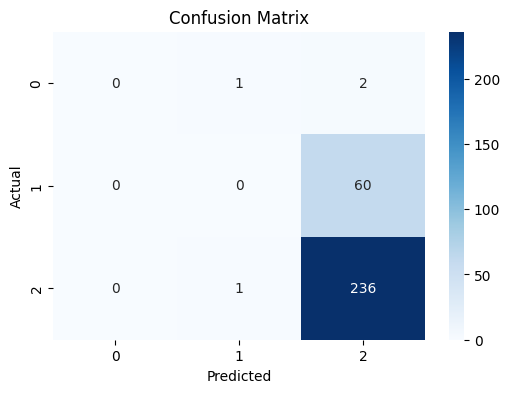


Feature Importance:

              feature  importance
4           followers    0.262511
1      likes_per_post    0.231255
3  time_spent_minutes    0.226975
2   comments_per_post    0.187055
0       posts_per_day    0.092204


In [ ]:
# =========================
# 1. IMPORT LIBRARIES
# =========================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 2. CREATE SYNTHETIC DATA
# =========================
np.random.seed(42)
n_samples = 1500

df = pd.DataFrame({
    "posts_per_day": np.random.poisson(3, n_samples),
    "likes_per_post": np.random.randint(5, 300, n_samples),
    "comments_per_post": np.random.randint(0, 60, n_samples),
    "time_spent_minutes": np.random.randint(15, 300, n_samples),
    "followers": np.random.randint(50, 8000, n_samples),
})

# =========================
# 3. CREATE REALISTIC TARGET (WITH NOISE)
# =========================
noise = np.random.normal(0, 40, n_samples)

engagement_score = (
    df["posts_per_day"] * 3 +
    df["likes_per_post"] * 0.02 +
    df["comments_per_post"] * 0.1 +
    df["time_spent_minutes"] * 0.05 +
    df["followers"] * 0.001 +
    noise
)

df["age_group"] = pd.cut(
    engagement_score,
    bins=[-np.inf, 60, 120, 200, np.inf],
    labels=["45+", "35-44", "25-34", "18-24"]
)

# =========================
# 4. ENCODE TARGET
# =========================
le = LabelEncoder()
df["age_group"] = le.fit_transform(df["age_group"])

# =========================
# 5. SPLIT DATA
# =========================
X = df.drop("age_group", axis=1)
y = df["age_group"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# =========================
# 6. TRAIN RANDOM FOREST
# =========================
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# =========================
# 7. EVALUATION
# =========================
y_pred = model.predict(X_test)

print("F1 Score (weighted):", round(f1_score(y_test, y_pred, average="weighted"), 3))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# =========================
# 8. CONFUSION MATRIX
# =========================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# =========================
# 9. FEATURE IMPORTANCE
# =========================
importance = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\nFeature Importance:\n")
print(importance)
